<a href="https://colab.research.google.com/github/Casare12/Casare12/blob/main/LOGISTIC_REGRESSION_FOR_TITANIC_DATASET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
# Loading dependencies
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline

import seaborn as sns
sns.set(style="white",color_codes=True)
sns.set(font_scale=1.5)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics

In [19]:
df_train=pd.read_csv("/content/TITANIC.csv")
df_train.shape

(1310, 14)

In [20]:
df_train.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [21]:
df_train.survived.value_counts()

0.0    809
1.0    500
Name: survived, dtype: int64

In [22]:
df_train.sex.value_counts()

male      843
female    466
Name: sex, dtype: int64

In [23]:
df_train.embarked.value_counts()

S    914
C    270
Q    123
Name: embarked, dtype: int64

In [24]:
df_train.isnull().sum()

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

In [25]:
df_train=df_train.drop(["name","ticket","cabin","boat","body","home.dest"], axis=1)
df_train.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1.0,1.0,female,29.0000,0.0,0.0,211.3375,S
1,1.0,1.0,male,0.9167,1.0,2.0,151.5500,S
2,1.0,0.0,female,2.0000,1.0,2.0,151.5500,S
3,1.0,0.0,male,30.0000,1.0,2.0,151.5500,S
4,1.0,0.0,female,25.0000,1.0,2.0,151.5500,S


In [26]:
def age_approx(cols):
    age=cols[0]
    pclass=cols[1]

    if pd.isnull(age):
      if pclass==1:
         return 37
      elif pclass==2:
          return 29
      else:
          return 24
    else:
          return age


In [27]:
df_train.groupby(["pclass"]).mean()

,survived,age,sibsp,parch,fare
pclass,,,,,
1.0,0.619195,39.159918,0.436533,0.365325,87.508992
2.0,0.429603,29.506705,0.393502,0.368231,21.179196
3.0,0.255289,24.816367,0.568406,0.400564,13.302889


In [30]:
df_train['age']=df_train[['age','pclass']].apply(age_approx,axis=1)

In [31]:
df_train.isnull().sum()

pclass      1
survived    1
sex         1
age         0
sibsp       1
parch       1
fare        2
embarked    3
dtype: int64

In [32]:
df_train.dropna(inplace=True)
df_train.isnull().sum()

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [33]:
df_train.shape

(1306, 8)

In [34]:
df_train.dtypes

pclass      float64
survived    float64
sex          object
age         float64
sibsp       float64
parch       float64
fare        float64
embarked     object
dtype: object

In [50]:
df_train_dummies=pd.get_dummies(df_train,columns=["sex"])

In [51]:
df_train_dummies=pd.get_dummies(df_train_dummies,columns=["embarked"])

In [52]:
df_train_dummies.head()

,pclass,survived,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,1.0,1.0,29.0000,0.0,0.0,211.3375,1,0,0,0,1
1,1.0,1.0,0.9167,1.0,2.0,151.5500,0,1,0,0,1
2,1.0,0.0,2.0000,1.0,2.0,151.5500,1,0,0,0,1
3,1.0,0.0,30.0000,1.0,2.0,151.5500,0,1,0,0,1
4,1.0,0.0,25.0000,1.0,2.0,151.5500,1,0,0,0,1


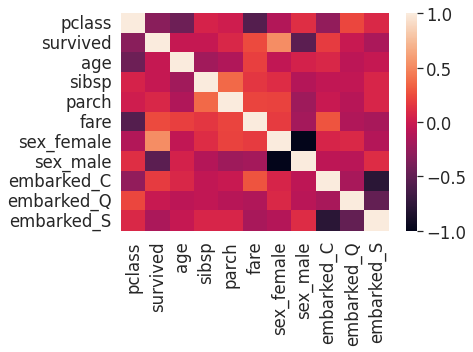

In [53]:
plt.figure(figsize=(6,4))
sns.heatmap(df_train_dummies.corr())

In [59]:
used_features=["pclass","age","sibsp","parch","sex_female","sex_male","embarked_C","embarked_Q","embarked_S"]
x=df_train_dummies[used_features].value_counts
y=df_train_dummies['survived']

In [60]:
X_train,X_test,Y_train,Y_test= train_test_split(x,y,test_size=0.3,random_state=1)

TypeError: ignored

In [62]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

NameError: ignored

In [63]:
logreg=LogisticRegression()

In [ ]:
logreg.fit(X_train,Y_train)

In [ ]:
ypred=logreg.predict(X_test)

In [ ]:
metrics.confusion_matrix(Y_test,ypred)

In [ ]:
metrics.accuracy_score(Y_test,ypred)

In [ ]:
len(X_test)

In [ ]:
print(classification_report(Y_test,ypred))

In [ ]:
logreg.coef_

In [ ]:
logreg.intercept_

In [64]:
df_train_dummies[used_features].columns

Index(['pclass', 'age', 'sibsp', 'parch', 'sex_female', 'sex_male',
       'embarked_C', 'embarked_Q', 'embarked_S'],
      dtype='object')

In [ ]:
logreg.predict_proba(X_test)